# Traffic Volume Visualization Tool

This notebook visualizes a specific traffic volume by its ID using cartopy.

**Usage:** Enter a traffic volume ID to visualize its geographic boundaries.

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)

## User Input

Enter the traffic volume ID you want to visualize:

In [12]:
# USER INPUT: Enter the traffic volume ID to visualize
traffic_volume_id = "LECBLGU"  # Example traffic volume ID - change this to visualize different volumes

print(f"Visualizing traffic volume: {traffic_volume_id}")

Visualizing traffic volume: LECBLGU


## Load Traffic Volume Data

In [13]:
# Load traffic volumes
traffic_volumes = gpd.read_file('D:/project-cirrus/cases/traffic_volumes_simplified.geojson')

print(f"Loaded {len(traffic_volumes)} traffic volumes")

Skipping field elementary_sectors: unsupported OGR type: 5


Loaded 358 traffic volumes


## Visualization Function

In [14]:
def plot_traffic_volume(tv_id, traffic_volumes):
    """
    Plot a specific traffic volume by its ID using cartopy
    """
    # Find the traffic volume by ID
    tv_row = traffic_volumes[traffic_volumes['traffic_volume_id'] == tv_id]
    
    if tv_row.empty:
        print(f"❌ Traffic volume '{tv_id}' not found")
        available_ids = traffic_volumes['traffic_volume_id'].head(10).tolist()
        print(f"Available IDs (first 10): {available_ids}")
        return
    
    # Get the geometry
    tv_geometry = tv_row.geometry.iloc[0]
    
    print(f"✅ Found traffic volume '{tv_id}'")
    
    # Create the plot with cartopy
    fig = plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Calculate bounds with some padding
    bounds = tv_geometry.bounds
    padding = 0.5  # degrees
    min_lon, min_lat, max_lon, max_lat = bounds
    # ax.set_extent([min_lon - padding, max_lon + padding, 
    #                min_lat - padding, max_lat + padding], 
    #               crs=ccrs.PlateCarree())
    # Set extent to Western Europe
    ax.set_extent([-10, 15, 35, 65], crs=ccrs.PlateCarree())
    
    # Add map features
    ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, linewidth=0.5)
    ax.add_feature(cfeature.LAND, alpha=0.3, color='lightgray')
    ax.add_feature(cfeature.OCEAN, alpha=0.3, color='lightblue')
    
    # Add gridlines
    gl = ax.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    
    # Plot the traffic volume
    ax.add_geometries([tv_geometry], ccrs.PlateCarree(),
                      facecolor='red', edgecolor='darkred',
                      alpha=0.7, linewidth=2)
    
    # Add label at the centroid
    centroid = tv_geometry.centroid
    ax.text(centroid.x, centroid.y, tv_id,
            transform=ccrs.PlateCarree(),
            ha='center', va='center',
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.9))
    
    # Set title
    plt.title(f'Traffic Volume: {tv_id}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

## Visualization

✅ Found traffic volume 'LECBLGU'


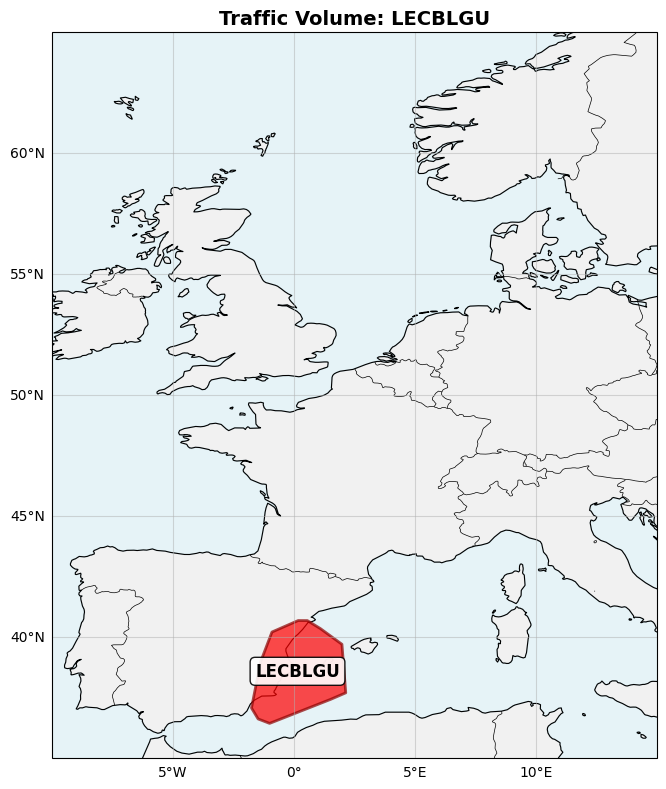

In [15]:
# Plot the specified traffic volume
plot_traffic_volume(traffic_volume_id, traffic_volumes)